In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.interpolate import interp1d
import seaborn as sns

from scipy.stats import linregress

import PythonGraphMod

In [15]:
# import data from ods files
low_f_df = pd.read_excel("../data/low_f.ods")
hight_f_df = pd.read_excel("../data/hight_f.ods")

# transofm data to numpy arrays
low_kxi = np.array(low_f_df['kxi'])
low_f2 = np.array(low_f_df['f^2'])
low_sqrtf = np.array(low_f_df['sqrt(f)'])

hight_kxi = np.array(hight_f_df['kxi'])
hight_f2 = np.array(hight_f_df['f^2'])
hight_sqrtf = np.array(hight_f_df['sqrt(f)'])
Delta_Fi = np.array(hight_f_df['Delta_Fi'])
Delta_Psi = np.array(hight_f_df['Delta_Psi'])

sqrt_f = np.concatenate((low_sqrtf, hight_sqrtf), axis=0, out=None, dtype=None)
sqr_f = np.concatenate((low_f2, hight_f2), axis=0, out=None, dtype=None)
kxi = np.concatenate((low_kxi, hight_kxi), axis=0, out=None, dtype=None)

In [42]:
lin_Fi  = linregress(hight_sqrtf[1:-5:1], Delta_Fi[1:-5:1])
lin_Psi = linregress(hight_sqrtf[1:-5:1], Delta_Psi[1:-5:1])
print('slope Delta_Fi = %f = slope Delta_Fi = %f' %(lin_Fi.slope, lin_Psi.slope))
print('Delta_Fi y0 = %f' %lin_Fi.intercept)
print('Delta_Psi y0 = %f ураааа, почти pi/4' %lin_Psi.intercept)

slope Delta_Fi = 0.021446 = slope Delta_Fi = 0.021446
Delta_Fi y0 = -0.819605
Delta_Psi y0 = 0.750395 ураааа, почти pi/4


Text(0.5, 1.0, 'График зависимости $\\Delta \\phi (\\sqrt{\\nu})$')

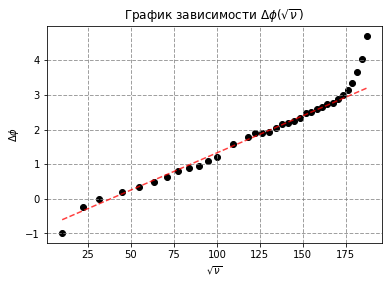

In [36]:
# create figure and graph
fig1, ax1 = PythonGraphMod.CreateSimpleGraph()

ax1.scatter(hight_sqrtf, Delta_Fi, c = 'black', marker = 'o')
ax1.plot(hight_sqrtf, lin_Fi.intercept + lin_Fi.slope * hight_sqrtf, color='red', alpha=.75, lw=1.5, ls='--')

PythonGraphMod.AddGreed(ax1)
plt.ylabel(r'$\Delta \phi$')
plt.xlabel(r'$\sqrt{\nu}$')
plt.title (r'График зависимости $\Delta \phi (\sqrt{\nu})$')


Text(0.5, 1.0, 'График зависимости $\\Delta \\psi (\\sqrt{\\nu})$')

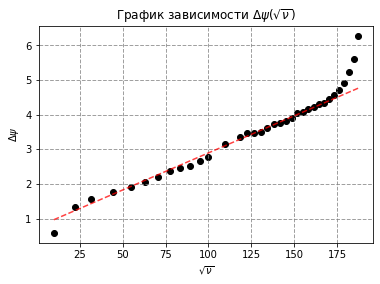

In [37]:

fig2, ax2 = PythonGraphMod.CreateSimpleGraph()

ax2.scatter(hight_sqrtf, Delta_Psi, c = 'black', marker = 'o')
ax2.plot(hight_sqrtf, lin_Psi.intercept + lin_Psi.slope * hight_sqrtf, color='red', alpha=.75, lw=1.5, ls='--')

PythonGraphMod.AddGreed(ax2)
plt.ylabel(r'$\Delta \psi$')
plt.xlabel(r'$\sqrt{\nu}$')
plt.title (r'График зависимости $\Delta \psi (\sqrt{\nu})$')


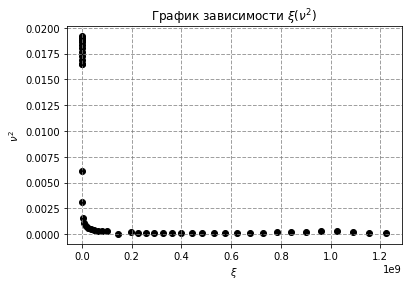

In [38]:

fig3, ax3 = PythonGraphMod.CreateSimpleGraph()

ax3.scatter(sqr_f, kxi, c = 'black', marker = 'o')

PythonGraphMod.AddGreed(ax3)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\nu^2$')
plt.title (r'График зависимости $\xi (\nu^2)$')

plt.show()